In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 10})

Load in the XLSX spreadsheet. Ultimately this should be replaced by published open data sources.

In [2]:
raw = pd.read_excel(
  '../../data/reference/Copy of NatCen 2023 - Administrative data on factors associated with youth NEET rates - Dataset.xlsx',
  sheet_name='Local Authority Data',
  
).set_index(['Local Authority Code', 'Local Authority Name', 'Group'])

raw.columns = raw.columns.str.strip()

Define and apply processing for transforming the raw to a processed dataset.

In [3]:
def z_score(series: pd.Series):
    return (series - series.mean()) / series.std()

def construct_weights(df, weighting=2):
    w = pd.Series(1, index=df.columns)
    key_metrics = [
      'Qualification below level 2 (age 16-24)',
      'Pupils with SEN support',
      'Disability (age < 25)',
      'IMD Health',
      'Economic inactivity (NEET)'
    ]
    w.loc[w.index.isin(key_metrics)] = weighting
    return w

def weighted_average(df, column_weights):
    res = df.mul(column_weights.to_dict()) / column_weights.sum()
    return res.sum(axis=1)

def score(df):
    total = pd.Series(df.sum(axis=1), name='Total Score')
    double_weighted = pd.Series(df.pipe(weighted_average, df.pipe(construct_weights, 2)), name='Weighted scores (double)')
    triple_weighted = pd.Series(df.pipe(weighted_average, df.pipe(construct_weights, 3)), name='Weighted scores (triple)')

    return pd.concat([
        df, total, double_weighted, triple_weighted
    ], axis=1)

data = raw.apply(z_score).pipe(score)

Save a melted version of this dataset (row per datapoint).

In [4]:
os.makedirs('../../data/processed/yff/', exist_ok=True)
data.melt(ignore_index=False).to_csv('../../data/processed/yff/neet-factors.csv')

## Data exploration

The section below visualises the dataset.

Distribution of raw data variables

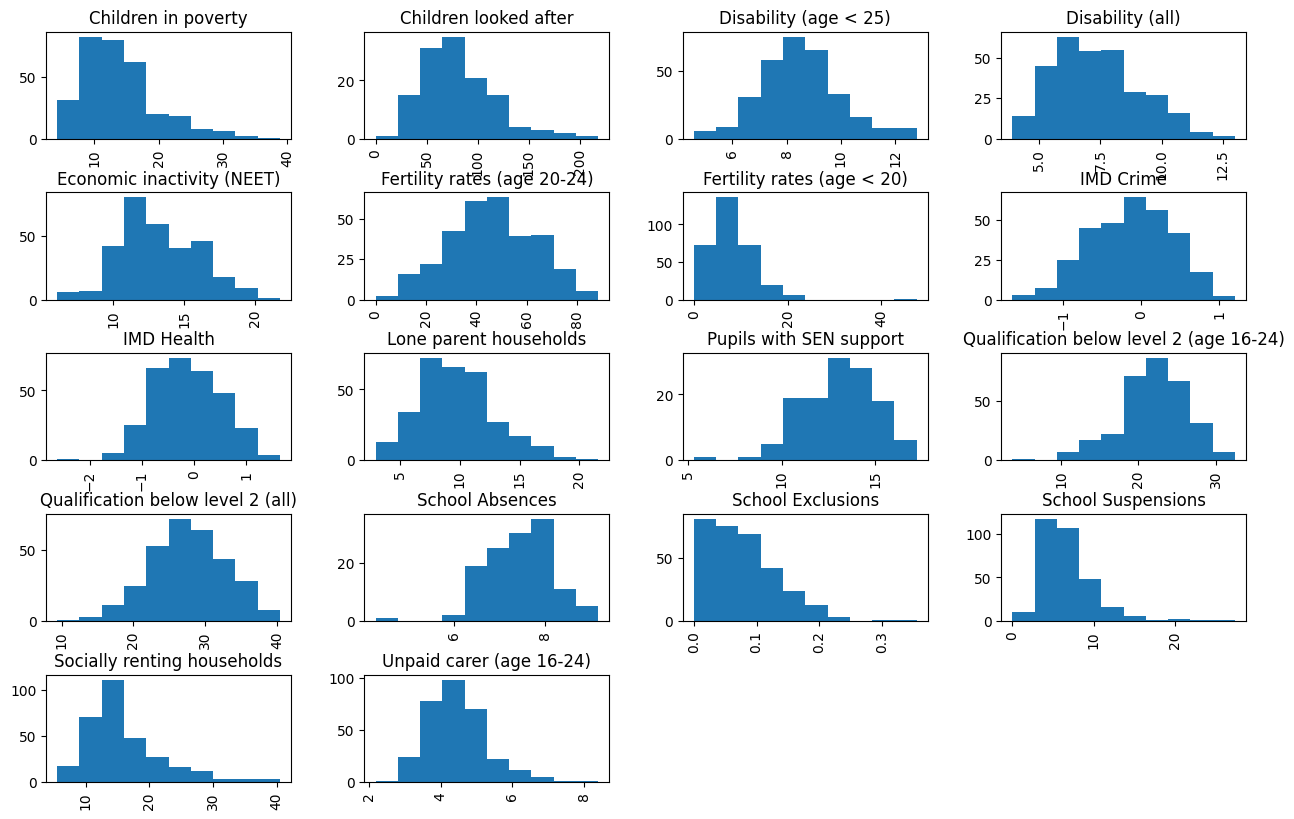

In [5]:
axes = raw.melt(ignore_index=False).hist(by='variable', figsize=(15,10))

Distribution of processed data variables - should be scaled version of raw data.

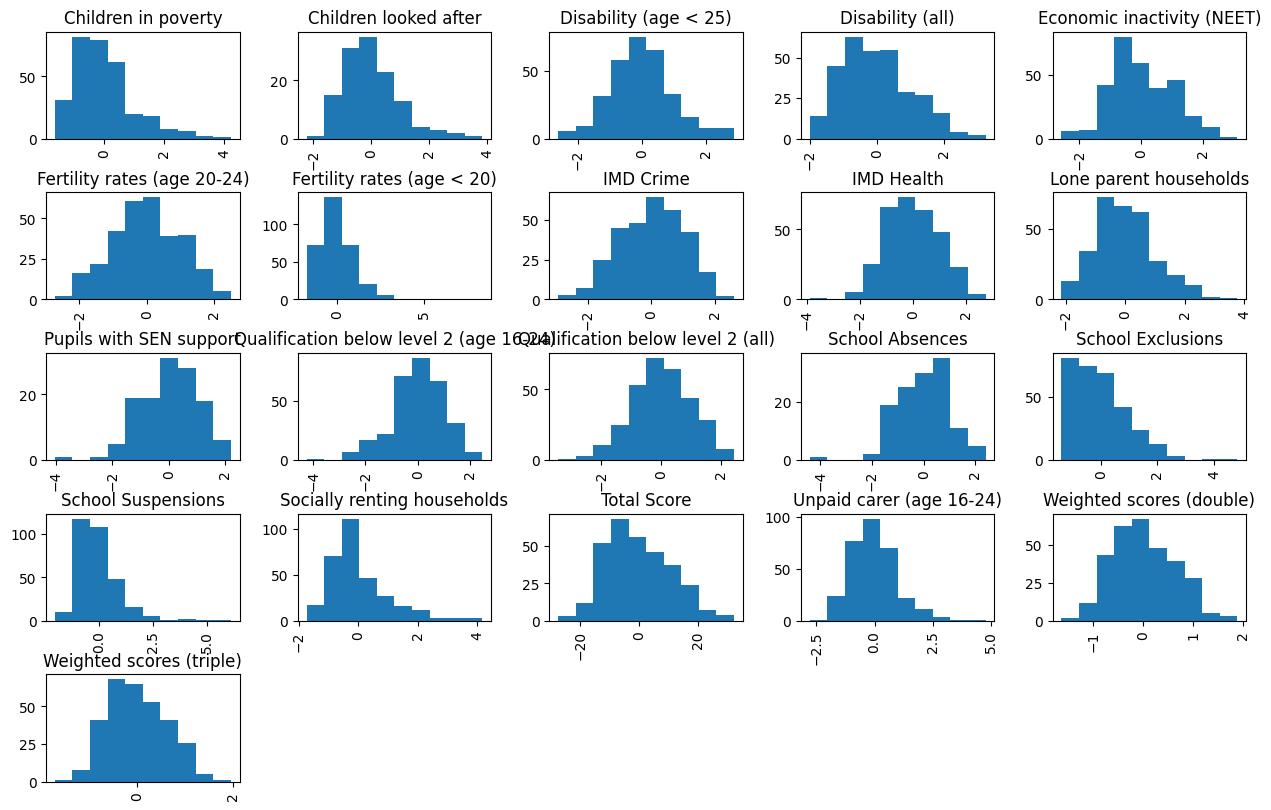

In [6]:
axes = data.melt(ignore_index=False).hist(by='variable', figsize=(15,10))

Count the number of variables that are defined

In [7]:
data.melt(ignore_index=False).groupby('variable').count().sort_values('value')

,value
variable,
Pupils with SEN support,128
Children looked after,128
School Absences,128
Lone parent households,304
Economic inactivity (NEET),308
Unpaid carer (age 16-24),309
Total Score,309
Socially renting households,309
School Suspensions,309


Visualise the size of each variable.

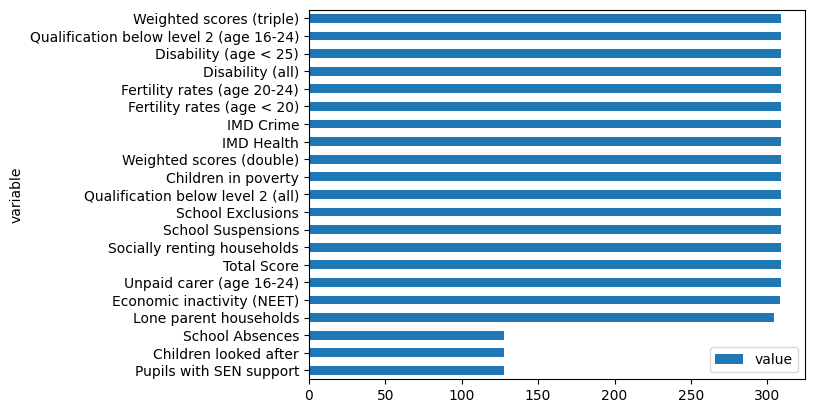

In [8]:
axes = data.melt(ignore_index=False).groupby('variable').count().sort_values('value').plot.barh()

Show the rows and columns with missing data.

In [9]:
complete_rows = data.notna().apply(all, axis=1)
complete_cols = data.notna().apply(all, axis=0)
data.loc[~complete_rows, ~complete_cols]


,,,School Absences,Pupils with SEN support,Lone parent households,Children looked after,Economic inactivity (NEET)
Local Authority Code,Local Authority Name,Group,,,,,
E06000053,Isles of Scilly,NaN,-1.474475,-4.030847,NaN,-2.225772,NaN
E07000008,Cambridge,University Towns and Cities,NaN,NaN,-0.651803,NaN,-1.897790
E07000009,East Cambridgeshire,Country Living,NaN,NaN,-1.606349,NaN,-0.933658
E07000010,Fenland,Country Living,NaN,NaN,0.509044,NaN,1.260791
E07000011,Huntingdonshire,Country Living,NaN,NaN,-0.380262,NaN,-0.653204
...,...,...,...,...,...,...,...
E07000243,Stevenage,Suburban Traits,NaN,NaN,-0.269480,NaN,0.281673
E07000244,East Suffolk,NaN,NaN,NaN,-0.274675,NaN,0.482838
E07000245,West Suffolk,NaN,NaN,NaN,-1.424736,NaN,-0.284442
